<a href="https://colab.research.google.com/github/bowwow-carrot/self_study_machine_learning-deep_learning/blob/main/4%EC%9D%BC%EC%B0%A8(%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8)_stopword.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
!pip install konlpy
 
프로젝트 주제 : 한국어 감정 분석기 
1 . 한국어 형태소 분석기를 활용한 , 전처리 
[[아 더빙 진짜 짜증, 0] , ['흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '1\n']
train  = [[아, 더빙, 진짜, 짜증] , [흠 , .. , 포스터, 보, 고 , 초딩, 영화..].....]
label = [0,1.....]

2 . 각 토큰이 자주 등장한 단어 순위
2 - 1 각 단어(토큰) 의 빈도수 체크
 ex)
vindos['아'] = 3000
vindos['진짜'] = 4200

2 - 2 빈도수 큰것부터 인덱스화 
ex)
'진짜' = 0
'아' = 1
train = [[0,32,1,54],[1,8,3,23]]
label = [0,1]

2 - 3 인덱스와 value 매칭이 되는 vocab dictionary
아 정말 짜증난다 -> [0,1,2,3]

---- 전처리 종료 ----------
3 - 1
sklearn - train, test split,  위 전처리한 파일을 분리
8 : 2

3 - 2
학습 진행 , 
vocab size, sequence 길이 조절
model epoch 10
validation data accuracy 57% 

"""
print()

In [ ]:
stop_words = []
with open('/content/drive/MyDrive/ai_project/stop_word(BOM).txt', mode='r',encoding='UTF-8') as data:
  all_line = data.readlines()
  for i in all_line :
    i = i.split("\n")
    token=komoran.morphs(i[0])
    stop_words = stop_words + token
print(stop_words)

['\ufeff', '아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따르', '아', '의하', '아', '을', '를', '에', '의', '가', '아', '으로', '로', '에게', '뿐', '이', '다', '의거', '하', '아', '근거', '하', '아', '입각', '하', '아', '기준', '으로', '예', '하', '면', '예', '를', '들', '면', '예', '를', '들', '자면', '저', '소인', '소생', '저희', '지', '말', '이', '고', '하', '지', '말', '아', '하지', '마라', '다른', '물론', '또한', '그리고', '비기', 'ㄹ', '수', '없', '다', '하', '아서', '는', '안', '되', 'ㄴ다', '뿐', '만', '아니', '라', '만', '이', '아니', '다', '만', '은', '아니', '다', '막론', '하', '고', '관계없이', '그치', '지', '않', '다', '그러나', '그런데', '하지만', '들', 'ㄴ', '간', '에', '논하', '지', '않', '다', '따지', '지', '않', '다', '설사', '비록', '덜', '라도', '아니', '면', '만', '못하', '다', '하', '는', '편', '이', '낫', '다', '불문', '하', '고', '향하', '아', '향하', '아서', '향하', '다', '쪽', '으로', '틈타', '아', '이용', '하', '아', '타', '다', '오르', '다', '제외', '하', '고', '이', '외', '에', '이', '밖', '에', '하', '아야', '비로소', '하', 'ㄴ다면', '모르', '아도', '외', '에', '도', '이곳', '여기', '부터', '기점', '으로', '따라서', '하', 'ㄹ', '생각', '이', '다', '하', '려고', '하', '다', '이리하여', '그리

In [ ]:
!pip install konlpy

In [ ]:
import os
import os.path as pth

#설명 추가해야됨.
from glob import glob

import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from sklearn.model_selection import train_test_split as tts
from keras.preprocessing.sequence import pad_sequences as p_seq
from tensorflow.keras.optimizers import Adam as adam
from keras import layers, models

#TPU 사용
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

# 훈련을 여러 GPU 또는 여러 장비, 여러 TPU로 나누어 처리하기 위한 텐서플로 API
strategy = tf.distribute.TPUStrategy(resolver)

from konlpy.tag import  Komoran
import matplotlib.pyplot as plt
import numpy as np

#stopWord
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.38.166.154:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.38.166.154:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
MODEL_NAME = 'RNN_test'
MODEL_PATH = '/content/drive/MyDrive/ai_project/RNN_project_data/'

In [ ]:
example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울때는 중요한 게 있지. 알 수 있다."
word_tokens = word_tokenize(example)
print(word_tokens)
print(Komoran().morphs(example))
result = []
for w in word_tokens :
  if w not in stop_words :
    result.append(w)
print(result)

['고기를', '아무렇게나', '구우려고', '하면', '안', '돼', '.', '고기라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살을', '구울때는', '중요한', '게', '있지', '.', '알', '수', '있다', '.']
['고기', '를', '아무렇', '게', '나', '굽', '려고', '하', '면', '안', '되', '어', '.', '고기', '이', '라고', '다', '같', '은', '게', '아니', '거든', '.', '예컨대', '삼겹살', '을', '굽', 'ㄹ', '때', '는', '중요', '하', 'ㄴ', '게', '있', '지', '.', '알', 'ㄹ', '수', '있', '다', '.']
['고기를', '아무렇게나', '구우려고', '하면', '안', '돼', '.', '고기라고', '다', '같은', '게', '아니거든', '.', '삼겹살을', '구울때는', '중요한', '게', '있지', '.', '알', '수', '.']


In [ ]:
komoran = Komoran()

#/content/drive/MyDrive/ai_project/ratings_train.txt
#/content/ratings_train.txt
# 에러코드정리
#   UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 0: unexpected end of data :: UTF-16 코드
#     xFF xFE(0xFFFE)는 BOM(Byte order Mark)라고 한다고 한다.
#     16비트 문자의 경우 빅엔디안(0xFE FF)인지, 리틀엔디안(0xFF FE)인지를 구분하기 위한 헤더
#   UnicodeError: UTF-16 stream does not start with BOM :: cp949 인코드
with open('/content/drive/MyDrive/ai_project/ratings_train_utf8(DOM).txt', mode='r',encoding='UTF-8') as data:
  all_line = data.readlines()
  train = [] #앞으로의 y 값
  result = []
  label = []
  vocab = []
  #'id\tdocument\tlabel\n', '9976970\t아 더빙.. 진짜 짜증나네요 목소리\t0\n',
  count = 0
  for i in all_line :
    if count == 20000: #layers.Embedding(max_features, 128)(x) 에 크기를 맞춰줘야됨.
      break
    i = i.split('\t')
    # [id, document,label]
    
    token=komoran.morphs(i[1]) #morphs 로 내용 학습
    for w in token : 
      if w not in stop_words :
        result.append(w)
    train.append(result)
    result = []

    
    """
    vocab.append(i[1])
    token = word_tokenize(i[1])
    for w in token :
      if w not in stop_words :
        result.append(w)
    train.append(result)
    result = []
    """


    label_num=i[2].rstrip('\n') 
    label.append(label_num)
    count = count + 1

In [ ]:
# 주 목표 : 위의 x_train과 y_train처럼 만들어주는 것이 목표.
#2 - 1 각 단어(토큰) 의 빈도수 체크
vindos = {}
for i in train:
  for j in i :
    if j in vindos:
      vindos[j] = vindos[j]+1
    else :
      vindos[j] = 1

vindos_list1 = [[k,v] for k, v in zip(vindos.keys(),vindos.values())]
vindos_key = list(vindos)
vindos_val = list(vindos.values())


#2 - 2 빈도수 큰것부터 인덱스화 
test_train = [[vindos[j] for j in i] for i in train]
for i in test_train:
  i.sort(reverse=True)

#2 - 3 인덱스와 value 매칭이 되는 vocab dictionary
#아 정말 짜증난다 -> [0,1,2,3]

vocab_dict = {k:v for k,v in zip(vocab, test_train)}

In [ ]:
vindos

{'더빙': 64,
 '.': 15368,
 '짜증': 190,
 '네요': 983,
 '목소리': 37,
 '흠': 40,
 '...': 3392,
 '포스터': 85,
 '보고': 195,
 '초딩': 50,
 '영화': 7068,
 '....': 286,
 '오버': 16,
 '연기': 962,
 '가볍': 48,
 '너무재밓었다그래서보는것을추천한다': 1,
 '교도소': 3,
 '이야기': 272,
 '구먼': 5,
 '..': 1076,
 '솔직히': 148,
 '재미': 500,
 '평점': 836,
 '조정': 6,
 '사이몬페그의': 1,
 '익살': 3,
 '스럽': 330,
 '돋보이': 43,
 '던': 757,
 '!': 1576,
 '스파이더맨': 15,
 '늙': 18,
 '보이': 360,
 '커스틴 던스트': 1,
 '너무나': 94,
 '이뻐보였다': 1,
 '막': 68,
 '걸음마': 1,
 '떼': 30,
 '3': 299,
 '세': 162,
 '초등학교': 17,
 '1': 712,
 '학년': 18,
 '생': 67,
 '8살용영화.ㅋㅋㅋ...별반개도': 1,
 '아깝': 597,
 '원작': 168,
 '긴장감': 115,
 '제대로': 96,
 '살리': 61,
 '별': 204,
 '반개': 30,
 '욕': 127,
 '나오': 903,
 '이응경': 1,
 '길용우': 1,
 '생활': 12,
 'ㄴ지': 237,
 '정말': 1266,
 '발로': 12,
 '그것': 97,
 '낫겟다': 1,
 '납치': 5,
 '감금': 1,
 '반복': 23,
 '드라마': 650,
 '가족': 131,
 '모이': 6,
 '액션': 336,
 '는데': 1547,
 '낮': 180,
 '?': 2276,
 '꽤': 65,
 '헐리우드': 20,
 '식': 80,
 '화려': 56,
 '너무': 1350,
 '길들이': 1,
 '걍인피니트가짱이다.진짜짱이다♥': 1,
 '볼': 123,
 '마다': 85,
 '눈물': 1

In [ ]:
#2 - 3 인덱스와 value 매칭이 되는 vocab dictionary

#test_train

#test_dict = {'아 정말 짜증난다' : [0,1,2,3]}
#test_dict = {'test':test_train[2]}
#test_dict

#vocab_dict = {k:v for k,v in zip(vocab, test_train)}
#vocab_dict

In [ ]:
#3 - 1 sklearn - train, test split,  위 전처리한 파일을 분리 8 : 2 -> 코드제출 -> 예시 제출
"""
from sklearn.model_selection import train_test_split as tts
from keras.preprocessing.sequence import pad_sequences as p_seq
from tensorflow.keras.optimizers import Adam as adam
from keras import layers, models
import numpy as np

import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler, EarlyStopping
"""


max_features=20000
maxlen=100

test_label = np.array(label, dtype='int')
x_train, x_test, y_train, y_test = tts(test_train, test_label, test_size=0.2, random_state=42)
print(f"x_train:{len(x_train)}, y_train:{len(y_train)}, x_test:{len(x_test)}, y_test:{len(y_test)}")
x_train = p_seq(x_train, maxlen=maxlen)
x_test = p_seq(x_test, maxlen=maxlen)
#y_train = np.array(y_train, dtype='int')
#y_test = np.array(y_test, dtype='int')
print(f"x_train:{len(x_train)}, y_train:{len(y_train)}, x_test:{len(x_test)}, y_test:{len(y_test)}")

#3 - 2 학습 진행 , vocab size, sequence 길이 조절 model epoch 10 validation data accuracy 57%  -> 제출 로그파일 
#x = layers.Input((maxlen,)) #maxlen만큼 입력노드 생성
#h = layers.Embedding(max_features, 128)(x)
#h = layers.SimpleRNN(128)(h)
#y = layers.Dense(1, activation='sigmoid')(h)

#model = models.Model(x,y)



#keras.optimizers.Adam()
# Learning rate 0.1
# beta 1, 2 => beta 1 Momentum 0.9 ,  beta 2 Adagrad 0.99
# epsilon => Adagrad 분모 가 0 되는 것을 방지하기 위한 파라메터 0.00001
# decay => Learning rate 1 epoch 진행 마다 Decay 비율만큼 감소 0.01 or 0.0
# Learning rate = 0.1 , decay 0.01 
# 1 Epoch LR  = 0.1
# 2 Epoch LR  = 0.09

#adam의 옵션!!
#keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,beta_2=0.999,epsilon=none,amsgrad=False)
# epochs = 4 => 
"""
learning_rate: 0보다 크거나 같은 float 값. 학습률.
beta_1: 0보다 크고 1보다 작은 float 값. 일반적으로 1에 가깝게 설정됩니다.
beta_2: 0보다 크고 1보다 작은 float 값. 일반적으로 1에 가깝게 설정됩니다.
epsilon: 0보다 크거나 같은 float형 fuzz factor. None인 경우 K.epsilon()이 사용됩니다.
decay: 0보다 크거나 같은 float 값. 업데이트마다 적용되는 학습률의 감소율입니다.
amsgrad: 불리언. Adam의 변형인 AMSGrad의 적용 여부를 설정합니다. AMSGrad는 "On the Convergence of Adam and Beyond" 논문에서 소개되었습니다.
"""

with strategy.scope():
  x = layers.Input((maxlen,)) #maxlen만큼 입력노드 생성
  h = layers.Embedding(max_features, 128)(x)
  h = layers.SimpleRNN(128)(h)
  y = layers.Dense(1, activation='sigmoid')(h)
  model = models.Model(x,y)
  model.compile(loss='binary_crossentropy',optimizer=adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, decay=0.001),metrics=['accuracy'])

#val_loss가 적은 값이 적은 모델 저장
checkpoint_path = pth.join(MODEL_PATH, MODEL_NAME)
os.makedirs(checkpoint_path, exist_ok=True)
model_file_path = pth.join(checkpoint_path, 'Epoch_{epoch:03d}_Val_{val_loss:.3f}.hdf5')
checkpoint = ModelCheckpoint(filepath=model_file_path, monitor='val_loss', verbose=1, save_best_only=True)

# {patience}회간 val_loss가 좋아지지 않으면 중지.
#early_stopping = EarlyStopping(monitor='val_loss',patience=30)

batch_size = 1000
epochs = 300
history = model.fit(x_train, y_train,
           batch_size = batch_size,
           epochs = epochs,
           validation_data=(x_test, y_test),
           #callbacks=[checkpoint, early_stopping],
           callbacks=[checkpoint],
           )

x_train:16000, y_train:16000, x_test:4000, y_test:4000
x_train:16000, y_train:16000, x_test:4000, y_test:4000
Epoch 1/300
16/16 [==============================] - 11s 499ms/step - loss: 0.7912 - accuracy: 0.5002 - val_loss: 0.6915 - val_accuracy: 0.5215

Epoch 00001: val_loss improved from inf to 0.69153, saving model to /content/drive/MyDrive/ai_project/RNN_project_data/RNN_test/Epoch_001_Val_0.692.hdf5
Epoch 2/300
16/16 [==============================] - 1s 56ms/step - loss: 0.6840 - accuracy: 0.5418 - val_loss: 0.6715 - val_accuracy: 0.5633

Epoch 00002: val_loss improved from 0.69153 to 0.67148, saving model to /content/drive/MyDrive/ai_project/RNN_project_data/RNN_test/Epoch_002_Val_0.671.hdf5
Epoch 3/300
16/16 [==============================] - 1s 57ms/step - loss: 0.6440 - accuracy: 0.6093 - val_loss: 0.6128 - val_accuracy: 0.6440

Epoch 00003: val_loss improved from 0.67148 to 0.61276, saving model to /content/drive/MyDrive/ai_project/RNN_project_data/RNN_test/Epoch_003_Val_0.6

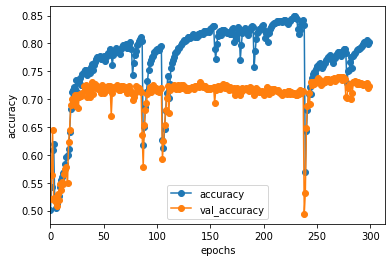

In [ ]:
# 훈련 결과를 확인
plt.plot(history.epoch, history.history['accuracy'], '-o', label='accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], '-o', label='val_accuracy')
plt.legend()
plt.xlim(left=0)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
"학습 기록장"

#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
## batch_size = 10, epochs = 8 =>loss:  0.5526 - accuracy: 0.7073
## batch_size = 20, epochs = 4 => loss: 0.4978 - accuracy: 0.7573
## batch_size = 20, epochs = 8 => loss: 0.4747 - accuracy: 0.7741
## batch_size = 20, epochs = 20=> loss: 0.5539 - accuracy: 0.7261 //50s
## batch_size = 32. epochs = 10=> 9/10 : loss: 0.4586 - accuracy: 0.7797, 10/10 : loss: 0.5709 - accuracy: 0.6973
## batch_size = 64. epochs = 4 => loss: 0.5084 - accuracy: 0.7492
## batch_size = 64. epochs = 8 => loss: 0.5062 - accuracy: 0.7529
## batch_size = no. epochs = 9 => loss: 0.5385 - accuracy: 0.7337
## batch_size = 110, epochs = 20 => loss: 0.2075 - accuracy: 0.9121 - val_loss: 0.9605 - val_accuracy: 0.7003 //18s overfitting epochs 5 best
## batch_size = 120, epochs = 5  => loss: 0.4071 - accuracy: 0.8126 - val_loss: 0.5647 - val_accuracy: 0.7135 //17s overfitting epochs 2 best
## batch_size = 120, epochs = 20 => loss: 0.2212 - accuracy: 0.9061 - val_loss: 0.9623 - val_accuracy: 0.7232 //15s overfitting
## batch_size = 200, epochs = 30 => loss: 0.3781 - accuracy: 0.8256 - val_loss: 0.5760 - val_accuracy: 0.7368 //16s overfitting epochs 20 best
## batch_size = 200, epochs = 20 => loss: 0.2351 - accuracy: 0.8979 - val_loss: 0.9516 - val_accuracy: 0.7185 //16s overfitting epochs 4 best
#model.compile(loss='binary_crossentropy',optimizer=adam(learning_rate=0.1, beta_1=0.99, beta_2=0.99, epsilon=0.00001, decay=0.0, amsgrad=False),metrics=['accuracy'])
## batch_size = 20, epochs = 4 => loss: 1.0007 - accuracy: 0.5050
#model.compile(loss='binary_crossentropy',optimizer=adam(beta_1=0.99),metrics=['accuracy'])
## batch_size = 20, epochs = 4 => loss: 0.5551 - accuracy: 0.7246
## batch_size = 20, epochs = 8 => loss: 0.5563 - accuracy: 0.7134
#model.compile(loss='binary_crossentropy',optimizer=adam(learning_rate=0.001, beta_1=0.9,beta_2=0.999,amsgrad=False),metrics=['accuracy'])
## batch_size = 20, epochs = 4 => loss: 0.5014 - accuracy: 0.7529
#model.compile(loss='binary_crossentropy',optimizer=adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, decay=0.01),metrics=['accuracy'])
## batch_size = 120, epochs = 30 => loss: 0.3883 - accuracy: 0.8248 - val_loss: 0.5389 - val_accuracy: 0.7400
#model.compile(loss='binary_crossentropy',optimizer=adam(learning_rate=0.1, beta_1=0.9, beta_2=0.99, decay=0.01),metrics=['accuracy'])
## batch_size = 120, epochs = 50 => loss: 0.5610 - accuracy: 0.6850 - val_loss: 0.7416 - val_accuracy: 0.5410 //15s underfitting
## batch_size = 300, epochs = 5  => loss: 0.6962 - accuracy: 0.5366 - val_loss: 0.7145 - val_accuracy: 0.4980 //12s underfitting
## batch_size = 500, epochs = 5  => loss: 0.7006 - accuracy: 0.5210 - val_loss: 0.7004 - val_accuracy: 0.5205 //12s underfitting
## batch_size = 1000, epochs = 5 => loss: 0.6795 - accuracy: 0.5429 - val_loss: 0.6792 - val_accuracy: 0.5395 //10s underfitting
## batch_size = 2000, epochs = 5 => loss: 0.7091 - accuracy: 0.5132 - val_loss: 0.7091 - val_accuracy: 0.4902 //12s underfitting
## batch_size = 1000, epochs = 50 => loss: 0.5210 - accuracy: 0.7422 - val_loss: 0.5430 - val_accuracy: 0.7335
## batch_size = 1000, epochs = 100 => loss: 0.5506 - accuracy: 0.7003 - val_loss: 0.6662 - val_accuracy: 0.6245

In [ ]:
#가장 좋은 모델의 가중치 불러오기
checkpoint_path = pth.join(MODEL_PATH, MODEL_NAME)
weigth_file = glob('{}/*.hdf5'.format(checkpoint_path))[-1]
print(weigth_file)
model.load_weights(weigth_file)

/content/drive/MyDrive/ai_project/RNN_project_data/RNN_test/Epoch_273_Val_0.550.hdf5


In [ ]:
#3-4 predict input text = '안녕하세요 여러분'
#=> preprocessing -> [0,3]
#=> seqlength = 100
#output => 0.63 -> 긍정에 가까운거.

"""
불용어 적용 전 :
[[529, 55, 12721, 804, 33, 12721, 983]]
array([[0.6263014]], dtype=float32)

불용어 적용 후 :
[[55, 804, 33, 983]]
array([[0.90063274]], dtype=float32)
"""

sentence = '오 감사합니다 신기하네요'
tokens=komoran.morphs(sentence)

voca_list = []
for token in tokens:
  if token in vindos.keys() :
    if token not in stop_words:
      voca_list.append(vindos[token])

voca_list = [voca_list]  # Tensor 형태로 변환

print(voca_list)
voca_list=p_seq(voca_list, maxlen=maxlen)
model.predict(voca_list)



[[55, 804, 33, 983]]


array([[0.90063274]], dtype=float32)

In [ ]:
"""
불용어, 자주 등장하지 않았던, 
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다', '.', '..',
                 '...', '을', '에서', '로', '것','주륵주륵','좔좔','아','휴','아이구','아이쿠','아이구','어','나','우리','저희']
단어에 대해서 제거
등장 횟수가 3회 미만 ->
성능 비교
하기전 : 78 %
한 후 : 79 %
불용어 제거 코드 , 성능 비교표 
귓속말로 제출 
"""